In [2]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:

TRAIN_DIR = 'D:/facial-expression-dataset/train/train/'
TEST_DIR = 'D:/facial-expression-dataset/test/test/'


In [4]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [5]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,D:/facial-expression-dataset/train/train/happy...,happy
1,D:/facial-expression-dataset/train/train/angry...,angry
2,D:/facial-expression-dataset/train/train/happy...,happy
3,D:/facial-expression-dataset/train/train/neutr...,neutral
4,D:/facial-expression-dataset/train/train/surpr...,surprise


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,D:/facial-expression-dataset/test/test/angry\P...,angry
1,D:/facial-expression-dataset/test/test/angry\P...,angry
2,D:/facial-expression-dataset/test/test/angry\P...,angry
3,D:/facial-expression-dataset/test/test/angry\P...,angry
4,D:/facial-expression-dataset/test/test/angry\P...,angry


In [7]:
train['label']

0           happy
1           angry
2           happy
3         neutral
4        surprise
           ...   
28704         sad
28705       happy
28706         sad
28707       angry
28708       angry
Name: label, Length: 28709, dtype: object

In [8]:
print(train['label'].unique()) 

['happy' 'angry' 'neutral' 'surprise' 'sad' 'disgust' 'fear']


<Axes: xlabel='label', ylabel='count'>

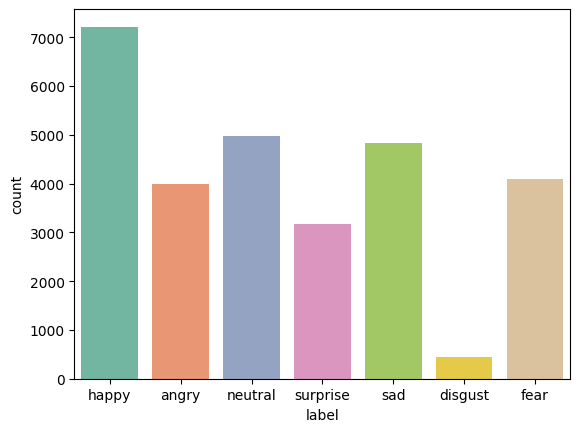

In [9]:
sns.countplot(x=train['label'], palette='Set2')


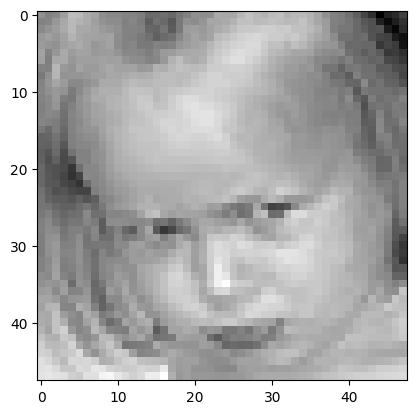

In [10]:
from PIL import Image
img = Image.open(train['image'][1])
plt.imshow(img, cmap='gray')

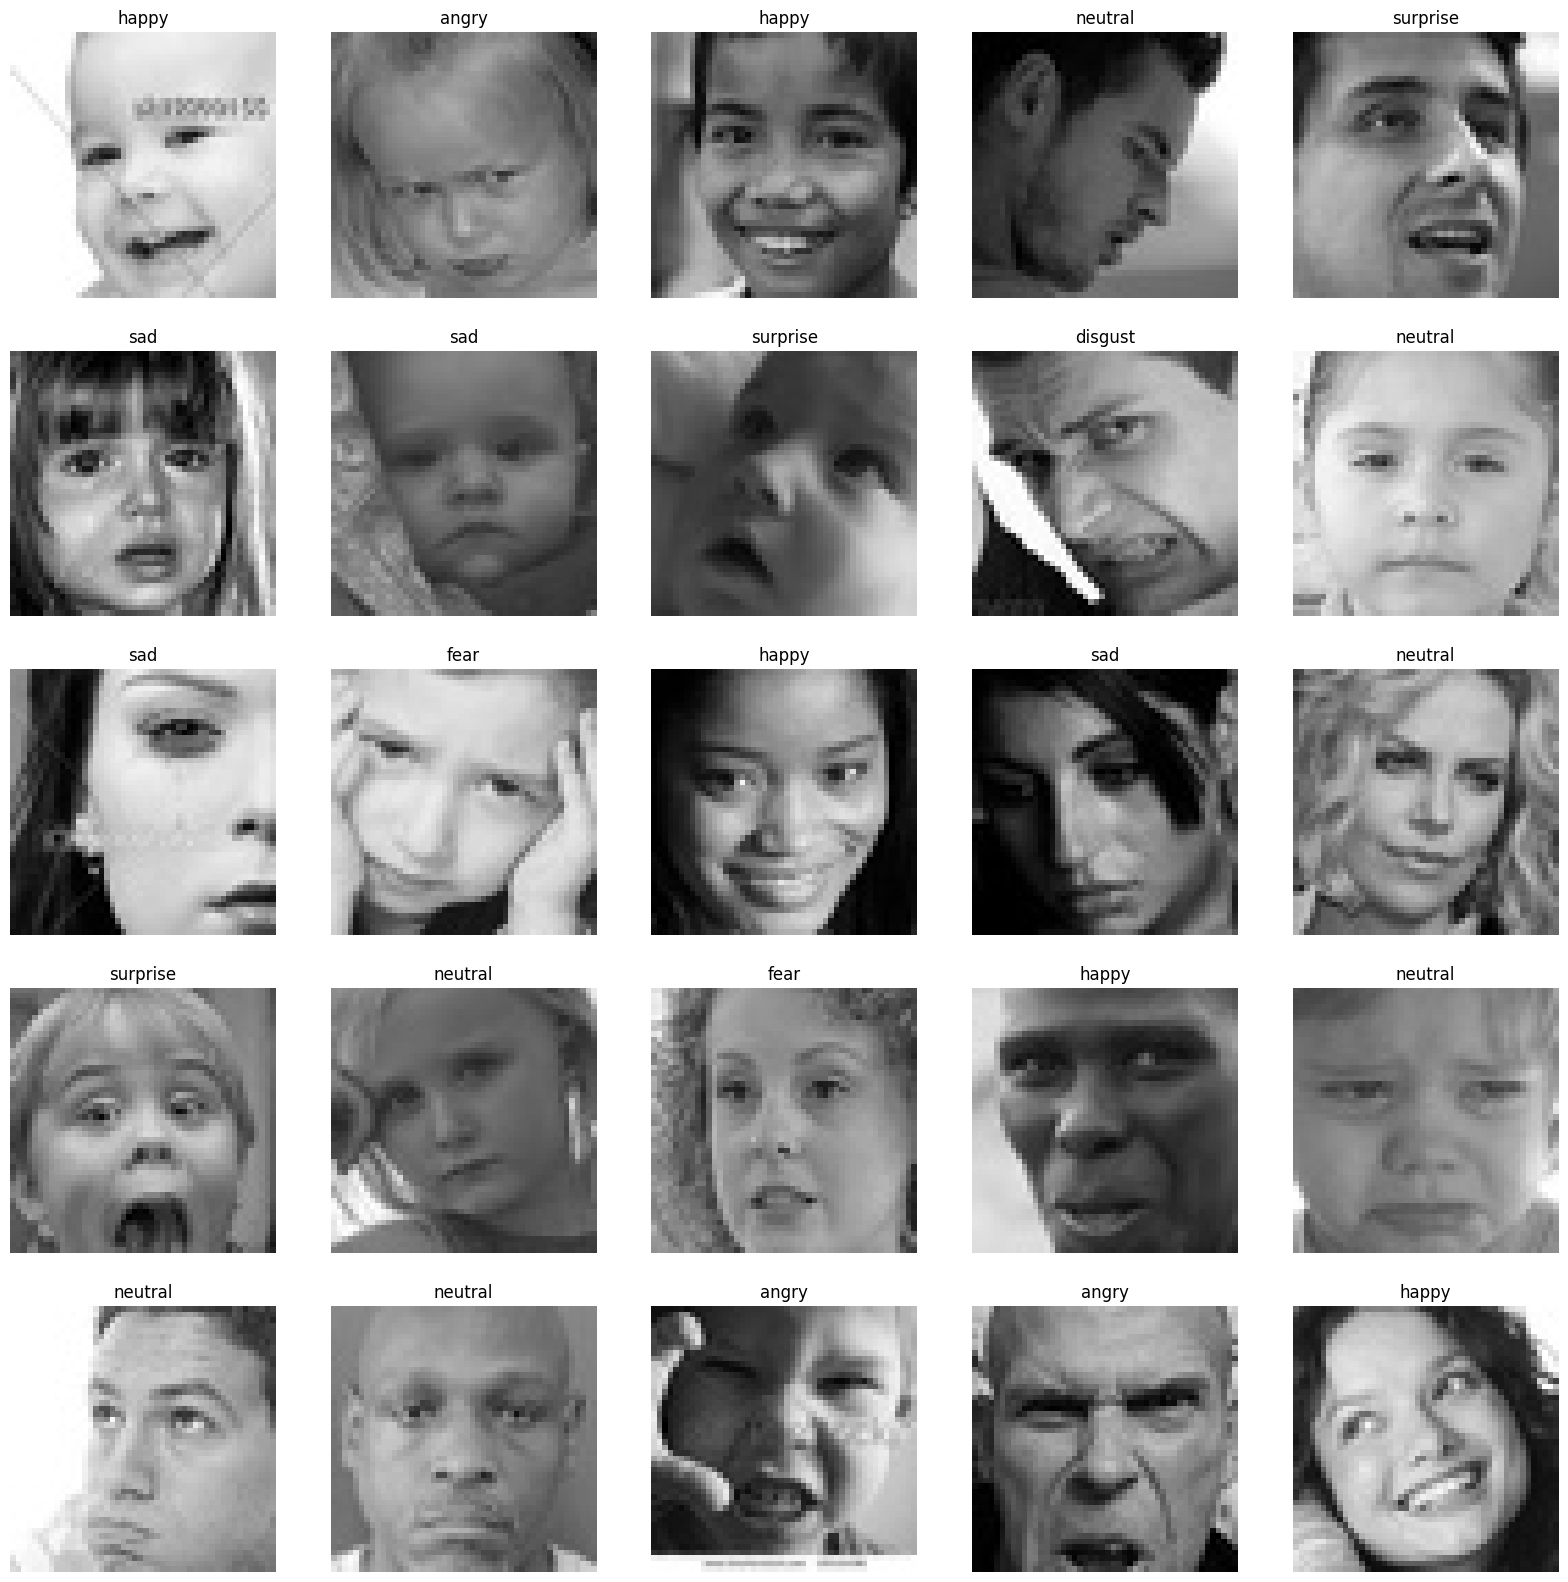

In [11]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [13]:
from tqdm import tqdm

In [14]:
train_features = extract_features(train['image'])


100%|██████████| 28709/28709 [06:06<00:00, 78.40it/s] 


In [15]:
test_features = extract_features(test['image'])


100%|██████████| 7178/7178 [00:09<00:00, 722.31it/s] 


In [16]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [17]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
##transform converts labels to integer

In [18]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [19]:
y_train[0]


array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [21]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
161/225 [====================>.........] - ETA: 1:07 - loss: 1.7380 - accuracy: 0.2805

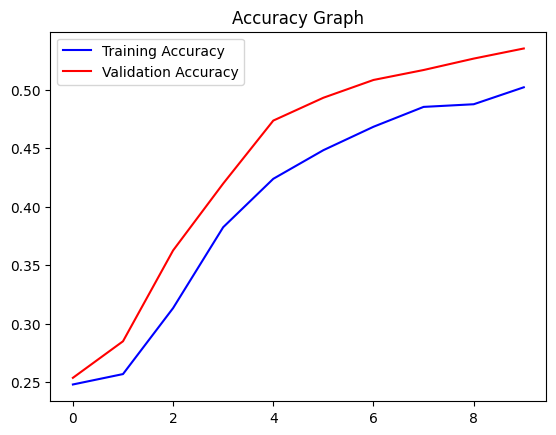

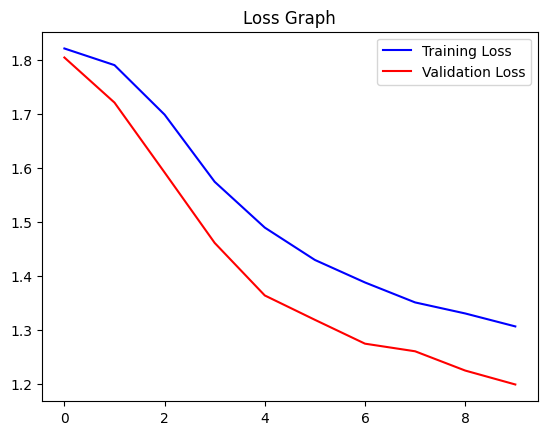

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: sad
1/1 [==============================] - 1s 732ms/step
Predicted Output: angry


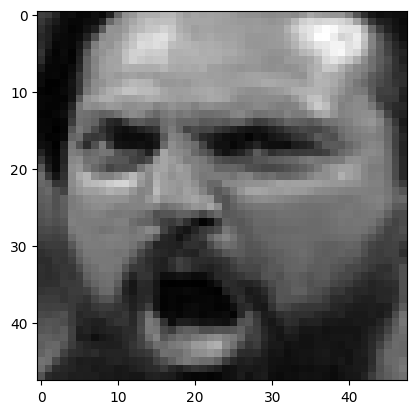

In [23]:
##testing 
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: sad
1/1 [==============================] - 0s 31ms/step
Predicted Output: neutral


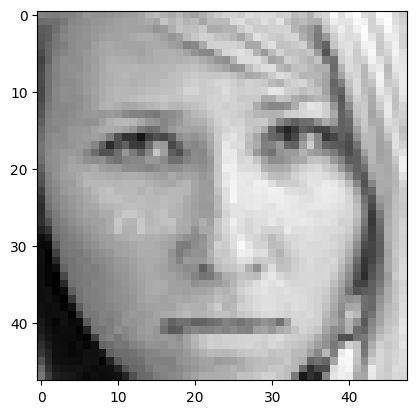

In [24]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 [==============================] - 0s 33ms/step
Predicted Output: angry


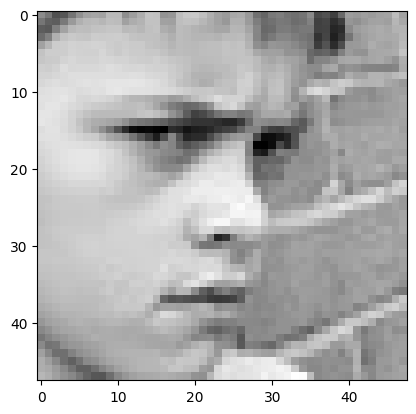

In [25]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [26]:
model.save('emotion_recognition_model.h5')


In [23]:
import joblib
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']